In [17]:
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
%matplotlib inline

import cv2
cv2.ocl.setUseOpenCL(False)

import json

In [2]:
model = tf.keras.models.load_model('../../saved_model/dqn_breakout')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 84, 84, 4)]       0         
_________________________________________________________________
tf_op_layer_Cast (TensorFlow (None, 84, 84, 4)         0         
_________________________________________________________________
tf_op_layer_truediv (TensorF (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 32)        8224      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0   

In [3]:
def pre_process(frame):
    gray = np.mean(frame, axis=2)
    return cv2.resize(gray, (84, 84), interpolation=cv2.INTER_AREA)

In [4]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [5]:
env = gym.make('BreakoutNoFrameskip-v4')
obs = env.reset()

(1, 84, 84, 4)

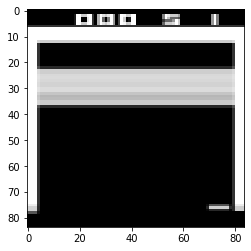

In [15]:
# ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']
frame_stack = np.zeros((1, 84, 84, 4))
for _ in range(4):
    a, b, c, d = env.step(3)
    processed = pre_process(a)
    next_state = np.reshape([processed], (1, 84, 84, 1))
    frame_stack = np.append(next_state, frame_stack[:, :, :, :3], axis=3)
plt.imshow(processed, cmap='gray')
np.shape(frame_stack)

In [38]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(frame_stack)
activation = (activations[3][0] * 255).astype(int)
y = activation[:, :, 0].ravel().tolist()

In [39]:
print(y)

[222, 222, 222, 440, 0, 0, 0, 0, 0, 0, 181, 221, 219, 0, 36, 222, 350, 0, 217, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 154, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

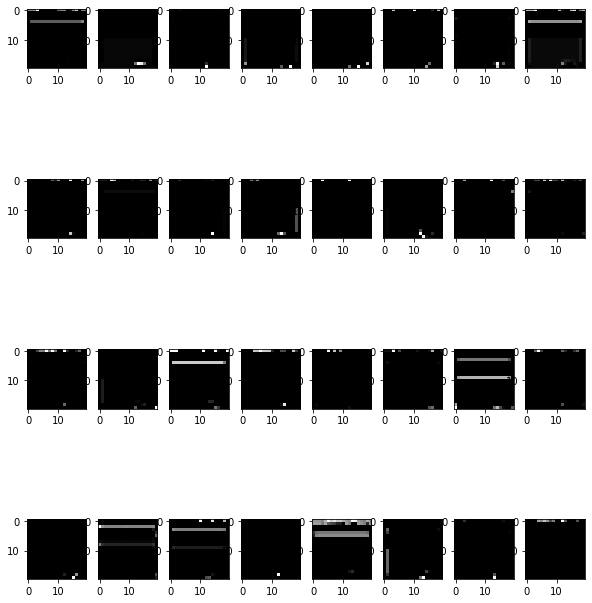

In [8]:
display_activation(activations, 8, 4, 3)

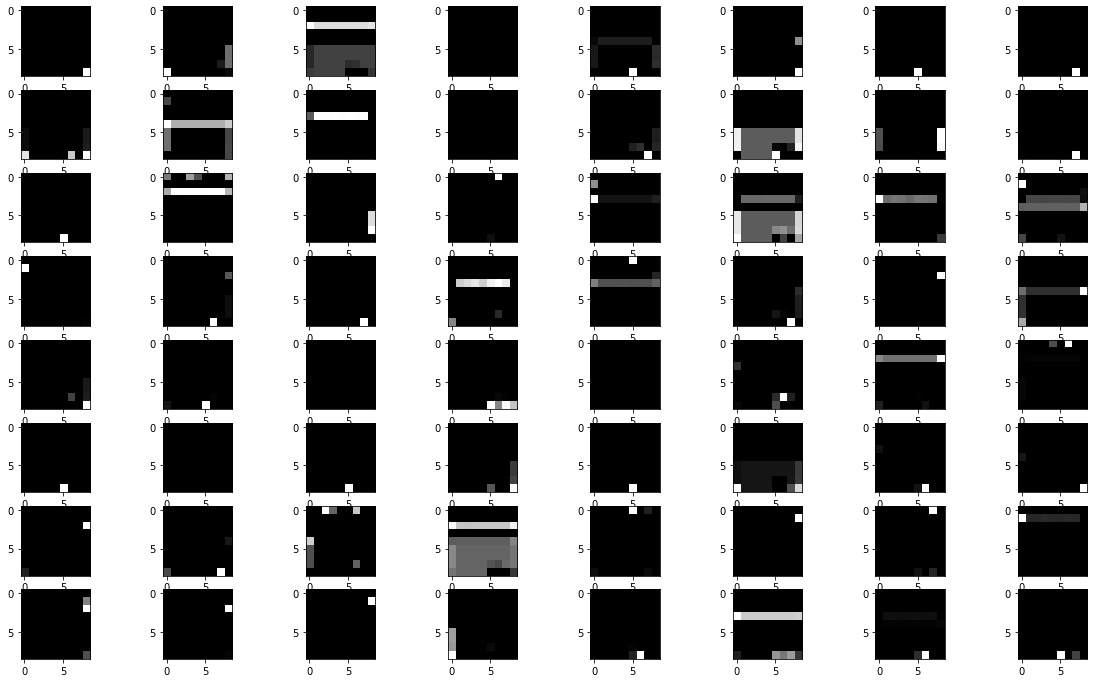

In [9]:
display_activation(activations, 8, 8, 4)

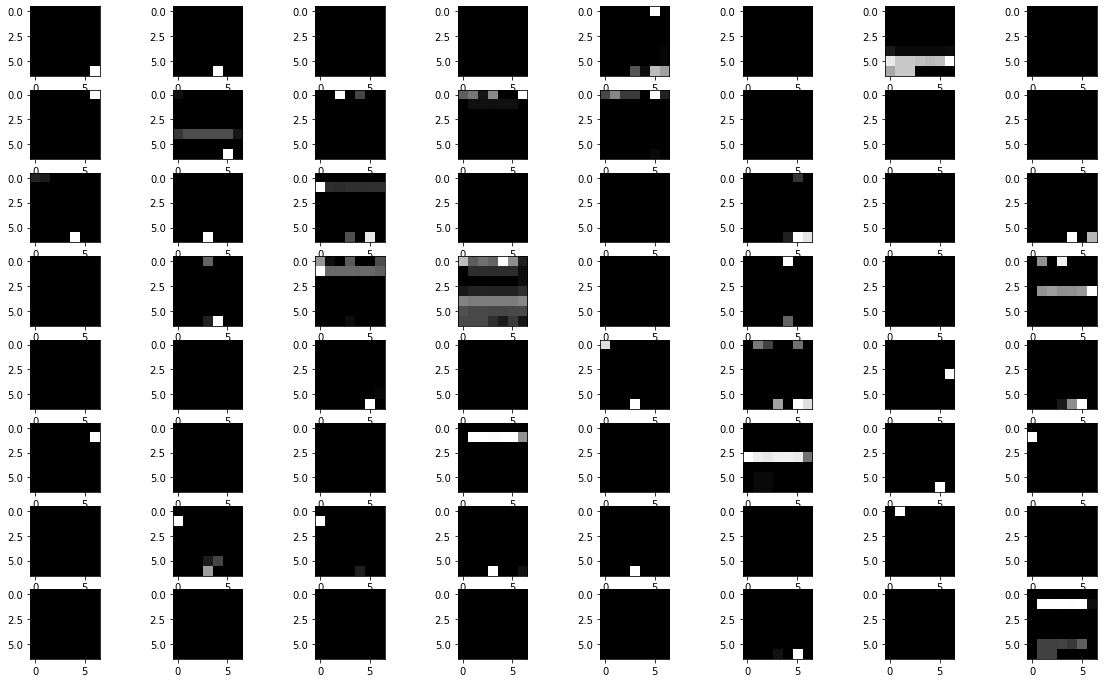

In [10]:
display_activation(activations, 8, 8, 5)

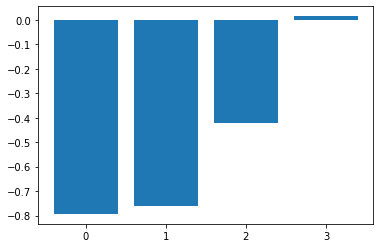

In [11]:
act_dense_1 = activations[9]
 
y = act_dense_1[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()